### Wrangling NYPD Motor Vehicle Collisions Data

In [82]:
import pandas as pd
import geopandas as gp
import zipfile
import shapely

In [4]:
NYPD = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', encoding = 'utf-8-sig')

In [5]:
NYPD.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,03/12/2016,14:10,MANHATTAN,10013.0,40.725673,-74.005780,"(40.725673, -74.00578)",VARICK STREET,SPRING STREET,NaN,...,Unspecified,NaN,NaN,NaN,3405175,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,03/13/2016,18:30,MANHATTAN,10007.0,40.715237,-74.013379,"(40.715237, -74.013379)",WEST STREET,MURRAY STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3405176,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,03/14/2016,10:50,MANHATTAN,10038.0,40.706408,-74.004559,"(40.706408, -74.004559)",JOHN STREET,FRONT STREET,NaN,...,Lost Consciousness,NaN,NaN,NaN,3405177,PASSENGER VEHICLE,SMALL COM VEH(4 TIRES),NaN,NaN,NaN
3,03/14/2016,10:20,NaN,NaN,NaN,NaN,NaN,WATER STREET,FULTON STREET,NaN,...,Lost Consciousness,NaN,NaN,NaN,3405178,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,03/14/2016,14:30,MANHATTAN,10005.0,40.704470,-74.006290,"(40.70447, -74.00629)",NaN,NaN,120 WALL STREET,...,NaN,NaN,NaN,NaN,3405179,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [6]:
NYPD.shape

(925492, 29)

In [7]:
NYPD.tail()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
925487,11/09/2016,17:11,BROOKLYN,11213.0,NaN,NaN,NaN,TROY AVENUE,SAINT JOHNS PLACE,NaN,...,Unspecified,NaN,NaN,NaN,3557874,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
925488,11/09/2016,14:11,BROOKLYN,11201.0,NaN,NaN,NaN,TILLARY STREET,GOLD STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3560209,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
925489,11/13/2016,18:11,BROOKLYN,11209.0,NaN,NaN,NaN,BAY RIDGE PARKWAY,5 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3560357,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
925490,11/11/2016,21:11,MANHATTAN,10019.0,NaN,NaN,NaN,9 AVENUE,WEST 48 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3561213,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
925491,11/14/2016,12:11,STATEN ISLAND,10305.0,NaN,NaN,NaN,NaN,NaN,625 CAPODANNO BOULEVARD,...,NaN,NaN,NaN,NaN,3561853,NaN,NaN,NaN,NaN,NaN


In [8]:
NYPD.columns[0]

u'DATE'

In [9]:
NYPD.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [10]:
NYPD.LATITUDE.isnull().sum()

187736

In [11]:
NYPD.LONGITUDE.isnull().sum()

187736

In [12]:
NYPD_2 = NYPD.dropna(subset = ['LATITUDE', 'LONGITUDE'])

In [14]:
NYPD_2 = NYPD_2.drop([u'ON STREET NAME', u'CROSS STREET NAME', u'OFF STREET NAME', 
                      u'CONTRIBUTING FACTOR VEHICLE 3', u'CONTRIBUTING FACTOR VEHICLE 4', 
                      u'CONTRIBUTING FACTOR VEHICLE 5', u'VEHICLE TYPE CODE 3', u'VEHICLE TYPE CODE 4',
                      u'VEHICLE TYPE CODE 5'], axis = 1)

In [15]:
NYPD_2.columns

Index([u'DATE', u'TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'NUMBER OF PERSONS INJURED', u'NUMBER OF PERSONS KILLED',
       u'NUMBER OF PEDESTRIANS INJURED', u'NUMBER OF PEDESTRIANS KILLED',
       u'NUMBER OF CYCLIST INJURED', u'NUMBER OF CYCLIST KILLED',
       u'NUMBER OF MOTORIST INJURED', u'NUMBER OF MOTORIST KILLED',
       u'CONTRIBUTING FACTOR VEHICLE 1', u'CONTRIBUTING FACTOR VEHICLE 2',
       u'UNIQUE KEY', u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2'],
      dtype='object')

In [16]:
NYPD_2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,03/12/2016,14:10,MANHATTAN,10013.0,40.725673,-74.005780,"(40.725673, -74.00578)",0,0,0,0,0,0,0,0,Unspecified,Unspecified,3405175,PASSENGER VEHICLE,PASSENGER VEHICLE
1,03/13/2016,18:30,MANHATTAN,10007.0,40.715237,-74.013379,"(40.715237, -74.013379)",0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,3405176,PASSENGER VEHICLE,PASSENGER VEHICLE
2,03/14/2016,10:50,MANHATTAN,10038.0,40.706408,-74.004559,"(40.706408, -74.004559)",0,0,0,0,0,0,0,0,Lost Consciousness,Lost Consciousness,3405177,PASSENGER VEHICLE,SMALL COM VEH(4 TIRES)
4,03/14/2016,14:30,MANHATTAN,10005.0,40.704470,-74.006290,"(40.70447, -74.00629)",0,0,0,0,0,0,0,0,NaN,NaN,3405179,PASSENGER VEHICLE,PASSENGER VEHICLE
6,03/14/2016,10:30,MANHATTAN,10013.0,40.724276,-74.011354,"(40.724276, -74.011354)",0,0,0,0,0,0,0,0,Unspecified,Unspecified,3405181,PASSENGER VEHICLE,PASSENGER VEHICLE


In [17]:
NYPD_2.DATE = pd.to_datetime(NYPD_2.DATE)

In [18]:
NYPD_2.DATE.max()

Timestamp('2016-11-15 00:00:00')

In [19]:
NYPD_2.DATE.min()

Timestamp('2012-07-01 00:00:00')

In [20]:
NYPD_2.groupby(NYPD_2.DATE.dt.year).count()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
DATE,,,,,,,,,,,,,,,,,,,,
2012,85436,85436,77560,77552,85436,85436,85436,85436,85436,85436,85436,85436,85436,85436,85436,85436,76219,85436,85431,76201
2013,171892,171892,155948,155934,171892,171892,171892,171892,171892,171892,171892,171892,171892,171892,171892,171686,152052,171892,171789,154177
2014,172636,172636,156277,156260,172636,172636,172636,172636,172636,172636,172636,172636,172636,172636,172636,172261,149677,172636,171992,154321
2015,182845,182845,163363,163338,182845,182845,182845,182845,182845,182845,182845,182845,182845,182845,182845,182163,160344,182845,182803,163648
2016,124947,124947,108241,108228,124947,124947,124947,124947,124947,124947,124947,124947,124947,124947,124947,123325,109469,124947,123806,102485


In [21]:
# combine lat and lon to one column
NYPD_2['lonlat'] = zip(NYPD_2.LONGITUDE, NYPD_2.LATITUDE)

# Create Point Geometry for based on lonlat column

In [22]:
NYPD_2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,lonlat
0,2016-03-12,14:10,MANHATTAN,10013.0,40.725673,-74.005780,"(40.725673, -74.00578)",0,0,0,...,0,0,0,0,Unspecified,Unspecified,3405175,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0057798, 40.7256734)"
1,2016-03-13,18:30,MANHATTAN,10007.0,40.715237,-74.013379,"(40.715237, -74.013379)",0,0,0,...,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,3405176,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0133794, 40.7152372)"
2,2016-03-14,10:50,MANHATTAN,10038.0,40.706408,-74.004559,"(40.706408, -74.004559)",0,0,0,...,0,0,0,0,Lost Consciousness,Lost Consciousness,3405177,PASSENGER VEHICLE,SMALL COM VEH(4 TIRES),"(-74.004559, 40.706408)"
4,2016-03-14,14:30,MANHATTAN,10005.0,40.704470,-74.006290,"(40.70447, -74.00629)",0,0,0,...,0,0,0,0,NaN,NaN,3405179,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0062901, 40.7044701)"
6,2016-03-14,10:30,MANHATTAN,10013.0,40.724276,-74.011354,"(40.724276, -74.011354)",0,0,0,...,0,0,0,0,Unspecified,Unspecified,3405181,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0113536, 40.7242759)"


In [23]:
NYPD_2.isnull().sum()

DATE                                 0
TIME                                 0
BOROUGH                          76367
ZIP CODE                         76444
LATITUDE                             0
LONGITUDE                            0
LOCATION                             0
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1     2885
CONTRIBUTING FACTOR VEHICLE 2    89995
UNIQUE KEY                           0
VEHICLE TYPE CODE 1               1935
VEHICLE TYPE CODE 2              86924
lonlat                               0
dtype: int64

In [24]:
NYPD_2['geometry'] = NYPD_2[['lonlat']].applymap(lambda x: shapely.geometry.Point(x))

In [25]:
NYPD_2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,lonlat,geometry
0,2016-03-12,14:10,MANHATTAN,10013.0,40.725673,-74.005780,"(40.725673, -74.00578)",0,0,0,...,0,0,0,Unspecified,Unspecified,3405175,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0057798, 40.7256734)",POINT (-74.0057798 40.7256734)
1,2016-03-13,18:30,MANHATTAN,10007.0,40.715237,-74.013379,"(40.715237, -74.013379)",0,0,0,...,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,3405176,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0133794, 40.7152372)",POINT (-74.01337940000001 40.7152372)
2,2016-03-14,10:50,MANHATTAN,10038.0,40.706408,-74.004559,"(40.706408, -74.004559)",0,0,0,...,0,0,0,Lost Consciousness,Lost Consciousness,3405177,PASSENGER VEHICLE,SMALL COM VEH(4 TIRES),"(-74.004559, 40.706408)",POINT (-74.004559 40.706408)
4,2016-03-14,14:30,MANHATTAN,10005.0,40.704470,-74.006290,"(40.70447, -74.00629)",0,0,0,...,0,0,0,NaN,NaN,3405179,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0062901, 40.7044701)",POINT (-74.0062901 40.7044701)
6,2016-03-14,10:30,MANHATTAN,10013.0,40.724276,-74.011354,"(40.724276, -74.011354)",0,0,0,...,0,0,0,Unspecified,Unspecified,3405181,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0113536, 40.7242759)",POINT (-74.01135359999999 40.72427589999999)


In [66]:
NYPD_geo = gp.GeoDataFrame(NYPD_2)

In [67]:
NYPD_geo

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,...,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,lonlat,geometry
0,2016-03-12,14:10,MANHATTAN,10013.0,40.725673,-74.005780,"(40.725673, -74.00578)",0,0,0,...,0,0,0,Unspecified,Unspecified,3405175,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0057798, 40.7256734)",POINT (-74.0057798 40.7256734)
1,2016-03-13,18:30,MANHATTAN,10007.0,40.715237,-74.013379,"(40.715237, -74.013379)",0,0,0,...,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,3405176,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0133794, 40.7152372)",POINT (-74.01337940000001 40.7152372)
2,2016-03-14,10:50,MANHATTAN,10038.0,40.706408,-74.004559,"(40.706408, -74.004559)",0,0,0,...,0,0,0,Lost Consciousness,Lost Consciousness,3405177,PASSENGER VEHICLE,SMALL COM VEH(4 TIRES),"(-74.004559, 40.706408)",POINT (-74.004559 40.706408)
4,2016-03-14,14:30,MANHATTAN,10005.0,40.704470,-74.006290,"(40.70447, -74.00629)",0,0,0,...,0,0,0,NaN,NaN,3405179,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0062901, 40.7044701)",POINT (-74.0062901 40.7044701)
6,2016-03-14,10:30,MANHATTAN,10013.0,40.724276,-74.011354,"(40.724276, -74.011354)",0,0,0,...,0,0,0,Unspecified,Unspecified,3405181,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0113536, 40.7242759)",POINT (-74.01135359999999 40.72427589999999)
7,2016-03-14,23:05,MANHATTAN,10007.0,40.714947,-74.009682,"(40.714947, -74.009682)",1,0,1,...,0,0,0,Pavement Slippery,NaN,3405182,PASSENGER VEHICLE,NaN,"(-74.0096819, 40.7149466)",POINT (-74.0096819 40.7149466)
8,2016-03-14,8:00,MANHATTAN,10013.0,40.719396,-74.001883,"(40.719396, -74.001883)",0,0,0,...,0,0,0,NaN,NaN,3405183,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0018831, 40.7193963)",POINT (-74.00188309999999 40.7193963)
9,2016-03-14,11:10,MANHATTAN,10007.0,40.714480,-74.013556,"(40.71448, -74.013556)",0,0,0,...,0,0,0,Unspecified,Unspecified,3405184,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.013556, 40.7144796)",POINT (-74.01355600000001 40.7144796)
10,2016-03-15,0:20,MANHATTAN,10007.0,40.714928,-74.007940,"(40.714928, -74.00794)",0,0,0,...,0,0,0,Prescription Medication,Prescription Medication,3405185,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-74.0079396, 40.7149276)",POINT (-74.0079396 40.7149276)
12,2016-03-14,9:00,MANHATTAN,10013.0,40.722324,-74.011747,"(40.722324, -74.011746)",0,0,0,...,0,0,0,Pavement Slippery,Pavement Slippery,3405187,PASSENGER VEHICLE,VAN,"(-74.0117465, 40.7223244)",POINT (-74.0117465 40.7223244)


In [83]:
type(NYPD_geo)

geopandas.geodataframe.GeoDataFrame

In [69]:
# Joining spatially with precint data

zip_ref = zipfile.ZipFile('summary_police_precincts.zip', 'r')
zip_ref.extractall('NYCPrecints')
zip_ref.close()

In [70]:
prec = gp.GeoDataFrame.from_file('NYCPrecints/summary_police_precincts.shp')

In [71]:
prec

,Ages_10_to,Ages_15_to,Ages_18_an,Ages_20_to,Ages_25_to,Ages_45_to,Ages_5_to_,Ages_65_an,Ages_Under,Precinct,...,SUM_Signal,SUM_SpeedH,SUM_VZ_P_1,SUM_VZ_P_2,SUM_VZ_Pri,Shape_Area,Shape_Le_1,Shape_Leng,Total_Pop,geometry
0,1487.0,2044.0,57815.0,6762.0,32579.0,12670.0,2317.0,4541.0,4279.0,1,...,0.000000,2.0,2.0,10.327099,0.000000,4.718442e+07,79979.877206,79980.250460,66679.0,(POLYGON ((-73.99911824702795 40.7265423115276...
1,1891.0,2290.0,45735.0,5091.0,16970.0,13730.0,1876.0,8824.0,1915.0,5,...,0.000000,1.0,4.0,17.730451,3.500406,1.808651e+07,18676.887438,18676.887678,52587.0,POLYGON ((-73.98863862797603 40.72293371941717...
2,971.0,3721.0,57225.0,4926.0,26362.0,14724.0,1417.0,8099.0,2006.0,6,...,0.000000,10.0,4.0,14.556454,0.000000,2.213190e+07,27182.397821,27182.687617,62226.0,POLYGON ((-73.99968392197817 40.73855224786502...
3,2634.0,3010.0,46746.0,4451.0,17417.0,14024.0,2614.0,9584.0,2602.0,7,...,0.000000,1.0,2.0,7.481489,0.000000,1.836303e+07,17301.484928,17301.492549,56336.0,"POLYGON ((-73.973453241494 40.71896288616242, ..."
4,2099.0,5068.0,68693.0,10398.0,30094.0,16635.0,1991.0,7895.0,2263.0,9,...,0.000000,20.0,4.0,14.589174,0.000000,2.139553e+07,19773.416893,19773.422085,76443.0,POLYGON ((-73.97160900220014 40.72672340009098...
5,1051.0,2063.0,45687.0,4065.0,20661.0,13324.0,1137.0,6276.0,1603.0,10,...,0.000000,2.0,3.0,12.343229,2.352452,2.722863e+07,40043.174972,40043.175251,50180.0,POLYGON ((-74.00138603716971 40.76285009377844...
6,1591.0,3537.0,85889.0,12007.0,38678.0,21213.0,1973.0,11464.0,3177.0,13,...,7.874529,1.0,4.0,25.463407,7.874529,2.950802e+07,27735.264626,27735.266468,93640.0,POLYGON ((-73.98155997054194 40.74388188225339...
7,228.0,683.0,19495.0,3257.0,9806.0,4226.0,295.0,1661.0,495.0,14,...,2.401106,0.0,8.0,20.770732,8.808607,2.051016e+07,20974.709394,20974.709243,20651.0,POLYGON ((-73.97464798041051 40.75336712161824...
8,1093.0,1289.0,73170.0,7390.0,32818.0,19034.0,1525.0,13222.0,2755.0,17,...,0.000000,1.0,6.0,18.851865,0.000000,2.227280e+07,25759.830638,25759.894553,79126.0,(POLYGON ((-73.96213559087609 40.7545732302261...
9,878.0,1085.0,49977.0,4750.0,24367.0,12999.0,979.0,7341.0,1667.0,18,...,2.043303,1.0,6.0,23.831566,2.043303,3.228033e+07,42179.884070,42179.905777,54066.0,POLYGON ((-73.99393666694623 40.77317984519032...


In [72]:
prec.columns

Index([u'Ages_10_to', u'Ages_15_to', u'Ages_18_an', u'Ages_20_to',
       u'Ages_25_to', u'Ages_45_to', u'Ages_5_to_', u'Ages_65_an',
       u'Ages_Under',   u'Precinct',    u'SUM_ASZ', u'SUM_BikeFa',
       u'SUM_BikeIn', u'SUM_Fatali', u'SUM_Injuri',    u'SUM_LPI',
       u'SUM_MVOFat', u'SUM_MVOInj', u'SUM_NeighS', u'SUM_PedFat',
       u'SUM_PedInj', u'SUM_SIPCor', u'SUM_SIPInt', u'SUM_Signal',
       u'SUM_SpeedH', u'SUM_VZ_P_1', u'SUM_VZ_P_2', u'SUM_VZ_Pri',
       u'Shape_Area', u'Shape_Le_1', u'Shape_Leng',  u'Total_Pop',
         u'geometry'],
      dtype='object')

In [73]:
prec2 = prec.drop([u'Ages_10_to', u'Ages_15_to', u'Ages_18_an', u'Ages_20_to', u'Ages_25_to', u'Ages_45_to', 
          u'Ages_5_to_', u'Ages_65_an', u'Ages_Under', u'SUM_ASZ', u'SUM_BikeFa', u'SUM_BikeIn', 
          u'SUM_Fatali', u'SUM_Injuri', u'SUM_LPI', u'SUM_MVOFat', u'SUM_MVOInj', u'SUM_NeighS', u'SUM_PedFat',
          u'SUM_PedInj', u'SUM_SIPCor', u'SUM_SIPInt', u'SUM_Signal', u'SUM_SpeedH', u'SUM_VZ_P_1', 
          u'SUM_VZ_P_2', u'SUM_VZ_Pri', u'Shape_Area', u'Shape_Le_1', u'Shape_Leng',  u'Total_Pop'], axis = 1)

In [74]:
prec2.head()

,Precinct,geometry
0,1,(POLYGON ((-73.99911824702795 40.7265423115276...
1,5,POLYGON ((-73.98863862797603 40.72293371941717...
2,6,POLYGON ((-73.99968392197817 40.73855224786502...
3,7,"POLYGON ((-73.973453241494 40.71896288616242, ..."
4,9,POLYGON ((-73.97160900220014 40.72672340009098...


In [75]:
prec2.shape

(77, 2)

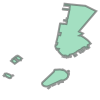

In [76]:
prec2.iloc[0].geometry

In [77]:
len(prec2)

77

In [89]:
prec2.crs

{'init': u'epsg:4326'}

In [92]:
NYPD_geo.crs = {'init': 'epsg:4326'}

In [93]:
NYPD_geo.crs

{'init': 'epsg:4326'}

In [94]:
collisions = gp.sjoin(prec2, NYPD_geo, how = 'inner', op = 'contains')

In [95]:
collisions.head()

,Precinct,geometry,index_right,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,...,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,lonlat
0,1,(POLYGON ((-73.99911824702795 40.7265423115276...,570756,2015-04-11,15:35,MANHATTAN,10012.0,40.724235,-73.997785,"(40.724235, -73.997785)",...,0,0,0,0,Turning Improperly,Unspecified,3202743,TAXI,PASSENGER VEHICLE,"(-73.9977848, 40.7242353)"
0,1,(POLYGON ((-73.99911824702795 40.7265423115276...,575660,2015-04-24,11:50,MANHATTAN,10012.0,40.724235,-73.997785,"(40.724235, -73.997785)",...,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,3208099,TAXI,TAXI,"(-73.9977848, 40.7242353)"
0,1,(POLYGON ((-73.99911824702795 40.7265423115276...,387454,2013-04-26,18:30,MANHATTAN,10012.0,40.724235,-73.997785,"(40.724235, -73.997785)",...,0,0,3,0,Unspecified,Unspecified,2482,TAXI,TAXI,"(-73.9977848, 40.7242353)"
0,1,(POLYGON ((-73.99911824702795 40.7265423115276...,226403,2014-08-30,13:45,MANHATTAN,10012.0,40.724235,-73.997785,"(40.724235, -73.997785)",...,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,1015833,PASSENGER VEHICLE,PASSENGER VEHICLE,"(-73.9977848, 40.7242353)"
0,1,(POLYGON ((-73.99911824702795 40.7265423115276...,393007,2013-05-03,15:30,MANHATTAN,10012.0,40.724235,-73.997785,"(40.724235, -73.997785)",...,0,0,0,0,Other Vehicular,Unspecified,2548,PASSENGER VEHICLE,BUS,"(-73.9977848, 40.7242353)"


In [96]:
collisions.columns

Index([                     u'Precinct',                      u'geometry',
                         u'index_right',                          u'DATE',
                                u'TIME',                       u'BOROUGH',
                            u'ZIP CODE',                      u'LATITUDE',
                           u'LONGITUDE',                      u'LOCATION',
           u'NUMBER OF PERSONS INJURED',      u'NUMBER OF PERSONS KILLED',
       u'NUMBER OF PEDESTRIANS INJURED',  u'NUMBER OF PEDESTRIANS KILLED',
           u'NUMBER OF CYCLIST INJURED',      u'NUMBER OF CYCLIST KILLED',
          u'NUMBER OF MOTORIST INJURED',     u'NUMBER OF MOTORIST KILLED',
       u'CONTRIBUTING FACTOR VEHICLE 1', u'CONTRIBUTING FACTOR VEHICLE 2',
                          u'UNIQUE KEY',           u'VEHICLE TYPE CODE 1',
                 u'VEHICLE TYPE CODE 2',                        u'lonlat'],
      dtype='object')

In [97]:
collisions = collisions.drop([u'geometry', u'index_right',
                                u'TIME',                       u'BOROUGH',
                            u'ZIP CODE',                      u'LATITUDE',
                           u'LONGITUDE',                      u'LOCATION',
       u'CONTRIBUTING FACTOR VEHICLE 1', u'CONTRIBUTING FACTOR VEHICLE 2',
                          u'UNIQUE KEY',           u'VEHICLE TYPE CODE 1',
                 u'VEHICLE TYPE CODE 2',                        u'lonlat'], axis = 1)

In [98]:
collisions.head()

,Precinct,DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,1,2015-04-11,0,0,0,0,0,0,0,0
0,1,2015-04-24,0,0,0,0,0,0,0,0
0,1,2013-04-26,3,0,0,0,0,0,3,0
0,1,2014-08-30,0,0,0,0,0,0,0,0
0,1,2013-05-03,0,0,0,0,0,0,0,0


In [100]:
collisions.groupby([collisions.DATE.dt.year, collisions.Precinct]).sum()

NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
DATE Precinct                                                        
2012 1                               215                         1   
     5                               212                         1   
     6                               127                         0   
     7                               121                         1   
     9                               166                         0   
     10                              177                         0   
     13                              318                         2   
     14                              296                         0   
     17                              256                         0   
     18                              275                         5   
     19                              336                         2   
     20                              154                         2   
     22                               61                         0   
     23                              184                         2   
     24                               84                         2   
     25                              265                         1   
     26                              107                         2   
     28                              140                         1   
     30                              135                         1   
     32                              174                         0   
     33                              190                         0   
     34                              182                         0   
     40                              303                         2   
     41                              207                         2   
     42                              161                         0   
     43                              313                         1   
     44                              295                         3   
     45                              309                         2   
     46                              232                         0   
     47                              400                         3   
...                                  ...                       ...   
2016 76                              227                         1   
     77                              394                         1   
     78                              297                         2   
     79                              441                         0   
     81                              240                         0   
     83                              363                         1   
     84                              337                         0   
     88                              212                         1   
     90                              554                         0   
     94                              274                         1   
     100                              99                         0   
     101                             152                         0   
     102                             547                         2   
     103                             602                         0   
     104                             474                         1   
     105                            1306                         5   
     106                             737                         7   
     107                             714                         0   
     108                             647                         4   
     109                             896                         7   
     110                             537                         1   
     111                             620                         1   
     112                             363                         1   
     113                             850                         0   
     114                 

In [103]:
collisions['Year'] = collisions.DATE.dt.year 

In [113]:
collisions['ID'] = collisions.Precinct.astype(str).str.zfill(3) + collisions.Year.astype(str)

In [124]:
collisions = collisions[(collisions['Year'] == 2013) | (collisions['Year'] == 2014) | (collisions['Year'] == 2015)]

In [126]:
collisions.head()

,Precinct,DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,Year,ID
0,1,2015-04-11,0,0,0,0,0,0,0,0,2015,0012015
0,1,2015-04-24,0,0,0,0,0,0,0,0,2015,0012015
0,1,2013-04-26,3,0,0,0,0,0,3,0,2013,0012013
0,1,2014-08-30,0,0,0,0,0,0,0,0,2014,0012014
0,1,2013-05-03,0,0,0,0,0,0,0,0,2013,0012013


In [136]:
cols = ['ID', u'NUMBER OF PERSONS INJURED', u'NUMBER OF PERSONS KILLED',
        u'NUMBER OF PEDESTRIANS INJURED', u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF CYCLIST INJURED',
        u'NUMBER OF CYCLIST KILLED', u'NUMBER OF MOTORIST INJURED', u'NUMBER OF MOTORIST KILLED']

In [137]:
Collisions = collisions[cols]

In [139]:
Collisions.head()

,ID,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,0012015,0,0,0,0,0,0,0,0
0,0012015,0,0,0,0,0,0,0,0
0,0012013,3,0,0,0,0,0,3,0
0,0012014,0,0,0,0,0,0,0,0
0,0012013,0,0,0,0,0,0,0,0


In [140]:
Collisions = Collisions.groupby(Collisions.ID).sum()

In [141]:
Collisions.head()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
ID,,,,,,,,
0012013,418,2,182,1,49,0,187,1
0012014,386,0,138,0,71,0,177,0
0012015,389,0,127,0,83,0,179,0
0052013,424,0,133,0,64,0,227,0
0052014,347,4,123,4,76,0,148,0


In [142]:
Collisions.shape

(231, 8)

In [143]:
Collisions.to_csv('VisionZero_Collisions.csv', encoding = 'utf-8')